# Fantasy Football

Playing with some data from Fantasy Football from the league I'm playing.

My team is Steely Dan Fan Club an this is our logo

![My Logo](./steely-dan-fan-club_cropped.png)

League's data extracted using [espnfantasyfootball](https://github.com/tbryan2/espnfantasyfootball).

## Initiate

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/players.csv")
mt = pd.read_csv("data/matches.csv")

## Some Variables to work with

In [93]:
my_team = "Steely Dan Fan Club"
last_full_week = 4

## Prepare

Rename columns

In [94]:
df.rename(columns={
    "Week": "week",
    "PlayerName": "name",
    "PlayerScoreActual": "score",
    "PlayerScoreProjected": "projected",
    "PlayerFantasyTeam": "team_index",
    "PlayerRosterSlot": "position",
    "TeamName": "team",
    "FullName": "user"
}, inplace=True)
mt.rename(columns={
    "Week": "week",
    "Name1": "team1",
    "Score1": "score1",
    "Name2": "team2",
    "Score2": "score2",
    "Type": "type"
}, inplace=True)

Filter only played weeks

In [95]:
df = df[df.week<=last_full_week]
mt = mt[mt.week<=last_full_week].drop_duplicates()

## Working Data

In [96]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 908
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   week        909 non-null    int64  
 1   name        909 non-null    object 
 2   score       909 non-null    float64
 3   projected   909 non-null    float64
 4   team_index  909 non-null    int64  
 5   position    909 non-null    object 
 6   team        909 non-null    object 
 7   user        909 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 63.9+ KB


,week,name,score,projected,team_index,position,team,user
0,1,Davante Adams,15.60,21.204351,1,WR,Team Theis,Maya Theis
1,1,Patrick Mahomes,18.54,24.679680,1,QB,Team Theis,Maya Theis
2,1,Aaron Jones,28.70,16.338186,1,RB,Team Theis,Maya Theis
3,1,T.J. Hockenson,12.00,13.890898,1,TE,Team Theis,Maya Theis
4,1,Brandon Aiyuk,37.90,11.752372,1,WR,Team Theis,Maya Theis


In [97]:
mt.info()
mt.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    28 non-null     int64  
 1   team1   28 non-null     object 
 2   score1  28 non-null     float64
 3   team2   28 non-null     object 
 4   score2  28 non-null     float64
 5   type    28 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


,week,team1,score1,team2,score2,type
0,1,Team Johnson,141.64,Team Quirk,160.76,Regular
1,1,Steely Dan Fan Club,132.24,Team Sand,61.10,Regular
2,1,Team Amar,106.98,Team Calzaretta,77.76,Regular
3,1,Team DarkBrandon,89.34,Team Theis,133.44,Regular
4,1,Team Bernier-Simard,112.28,Team FortyTwo,120.94,Regular


# Metrics, Tables and Charts

Teams wins and total scores

In [124]:
wins = pd.Series(np.where(mt.score1 > mt.score2, mt.team1, mt.team2)).value_counts()
scores = df[df.position!='Bench'].groupby(['team']).score.sum().sort_values(ascending=False)

pd.concat({'wins': wins, 'total_scores': scores}, axis=1).sort_values(['wins', 'total_scores'], ascending=False)

# To get the average point per match (week) per team
# df[df.position!='Bench'].groupby(['week', 'team']).score.sum().groupby('team').mean().sort_values(ascending=False)

,wins,total_scores
Team Vitale,4,560.82
Team Theis,3,571.44
Team Amar,3,476.48
Team Johnson,2,513.84
Team Calzaretta,2,466.66
Team dawkins,2,466.50
Steely Dan Fan Club,2,447.54
Team Quirk,2,436.66
Team timewonder,2,419.52
Team Bernier-Simard,2,405.48


Comparing players performances throughout the season

In [7]:
def plot_players_score_throughout_season(df, ax, players, title="Players performances throughout the season"):
    """ Given the DataFrame, the axes, and the players names, plot the scores of the players throughout the weeks of the season in the axes
    """
    
    df[df.name.isin(players)][['week', 'name', 'score']]\
        .pivot(columns="name", index="week", values="score")\
        .plot(ax=ax)
    
    ax.set_title(title)
    ax.legend(title=None)
    # ax.set_ylim(bottom=0)
    # Set xticks to be only integers
    from matplotlib.ticker import MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

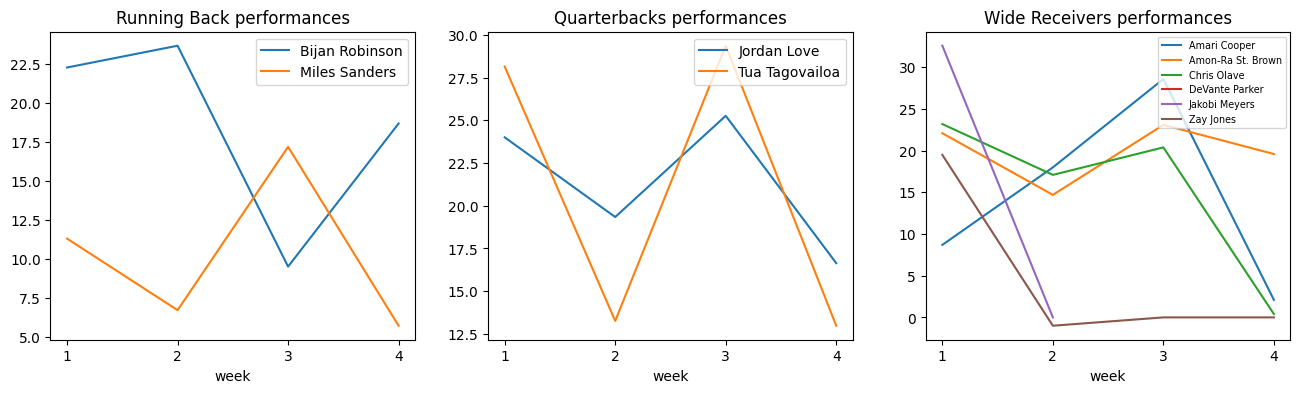

In [49]:
rbs = ["Bijan Robinson", "Miles Sanders"]
wrs = ["Amon-Ra St. Brown", "Chris Olave", "Amari Cooper", "Amari Cooper", "Jakobi Meyers", "DeVante Parker", "Zay Jones"]
qbs = ["Tua Tagovailoa", "Jordan Love"]

fig, ax = plt.subplots(figsize=(16,4), ncols=3)

plot_players_score_throughout_season(df[(df.team==my_team)], ax[0], rbs, title="Running Back performances")
plot_players_score_throughout_season(df[(df.team==my_team)], ax[1], qbs, title="Quarterbacks performances")
plot_players_score_throughout_season(df[(df.team==my_team)], ax[2], wrs, title="Wide Receivers performances")
ax[2].legend(fontsize="x-small")

Comparing projections with actual scores

Text(0.5, 1.0, 'Histogram of projection error (projected - actual score)')

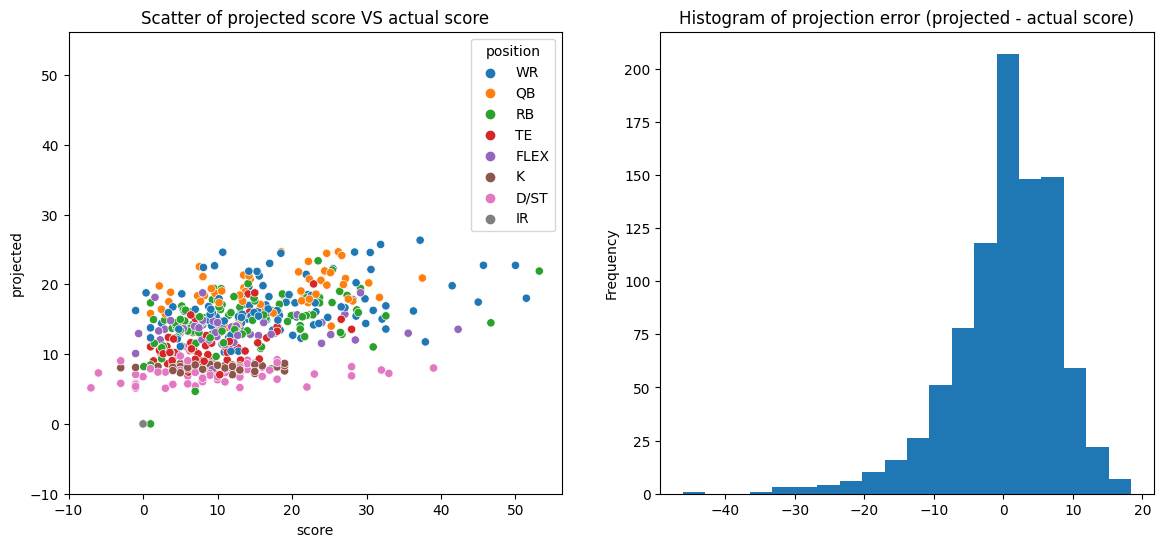

In [21]:
fig, axs = plt.subplots(figsize=(14, 6), ncols=2)

df['projection_error'] = df.projected - df.score

sns.scatterplot(data=df[df.position!='Bench'], x='score', y='projected', hue='position', ax=axs[0])
axs[0].set_title("Scatter of projected score VS actual score")
# Y axis limits to the same as X axis limits
axs[0].set_ylim(bottom=axs[0].get_xlim()[0], top=axs[0].get_xlim()[1])

df['projection_error'].plot.hist(bins=20, ax=axs[1])
axs[1].set_title("Histogram of projection error (projected - actual score)")


Comparing positions scores across teams, in Week 1

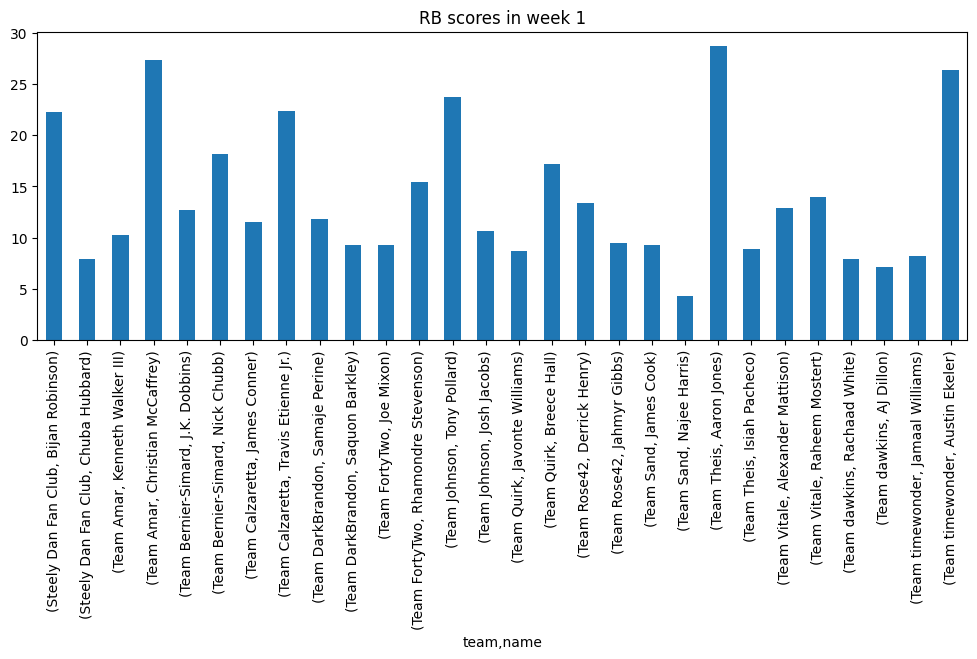

In [10]:
week = 1
position = 'RB'

rb_score_week_1 = df[(df.week==week) & (df.position==position)][["team", "name", "score"]]\
    .sort_values(by="team")\
    .set_index(["team", "name"])

fig, ax = plt.subplots(figsize=(12, 4))
rb_score_week_1.plot.bar(ax=ax, legend=False)

ax.set_title(f"{position} scores in week {week}")

plt.show()